In [1]:
import scanpy as sc
import cell2cell as c2c
import liana as li

import numpy as np
import pandas as pd

import os

from tqdm.auto import tqdm

# Directories

In [2]:
output_folder = '../Data/LIANA-outputs/'
c2c.io.directories.create_directory(output_folder)

../Data/LIANA-outputs/ already exists.


# Data

In [3]:
adata = c2c.datasets.balf_covid()

In [4]:
adata

AnnData object with n_obs × n_vars = 63103 × 33538
    obs: 'sample', 'sample_new', 'group', 'disease', 'hasnCoV', 'cluster', 'celltype', 'condition'

In [5]:
adata.obs.head()

,sample,sample_new,group,disease,hasnCoV,cluster,celltype,condition
AAACCCACAGCTACAT_3,C100,HC3,HC,N,N,27.0,B,Control
AAACCCATCCACGGGT_3,C100,HC3,HC,N,N,23.0,Macrophages,Control
AAACCCATCCCATTCG_3,C100,HC3,HC,N,N,6.0,T,Control
AAACGAACAAACAGGC_3,C100,HC3,HC,N,N,10.0,Macrophages,Control
AAACGAAGTCGCACAC_3,C100,HC3,HC,N,N,10.0,Macrophages,Control


# Short preprocessing

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

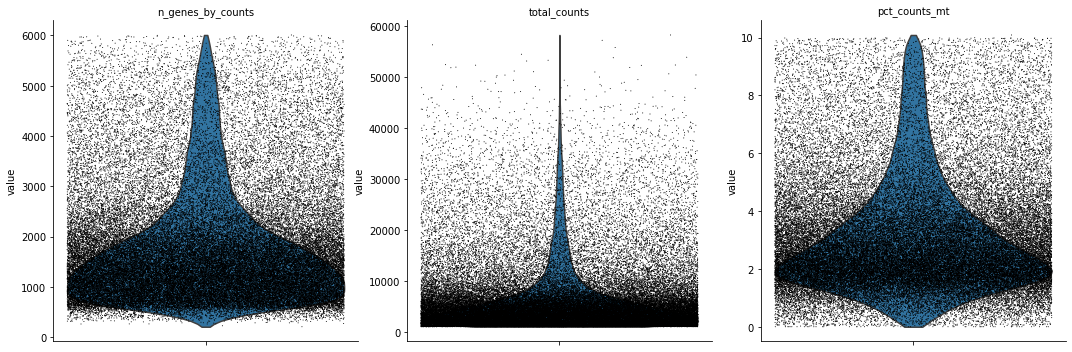

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

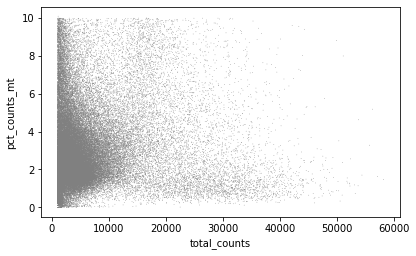

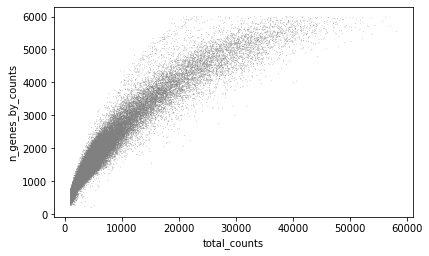

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [10]:
adata = adata[adata.obs.n_genes_by_counts < 5500, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

In [11]:
adata

View of AnnData object with n_obs × n_vars = 62552 × 24798
    obs: 'sample', 'sample_new', 'group', 'disease', 'hasnCoV', 'cluster', 'celltype', 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [12]:
sc.pp.normalize_total(adata, target_sum=1e6)

/Users/earmingol/opt/anaconda3/envs/c2c_dev/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.


In [13]:
sc.pp.log1p(adata)

In [14]:
adata.raw = adata.copy()

# Run LIANA

In [15]:
%%time
li.mt.rank_aggregate.by_sample(adata, sample_key='sample_new',
                               groupby='celltype', expr_prop=0.1, verbose=True)

Now running HC1
Using `.raw`!
5703 features of mat are empty, they will be removed.


Trying to set attribute `.obs` of view, copying.


The following cell identities were excluded: Plasma, pDC
0.33 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 8450 samples and 19095 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.14it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:29<00:00,  3.71it/s]


Now running HC2


Trying to set attribute `.obs` of view, copying.


Using `.raw`!
6725 features of mat are empty, they will be removed.
The following cell identities were excluded: NK, pDC
0.38 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 8149 samples and 18073 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.86it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [03:49<00:00,  4.36it/s]


Now running HC3


Trying to set attribute `.obs` of view, copying.


Using `.raw`!
5580 features of mat are empty, they will be removed.
The following cell identities were excluded: Plasma
0.33 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 2548 samples and 19218 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.47it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 14.00it/s]


Now running M1
Using `.raw`!
3113 features of mat are empty, they will be removed.


Trying to set attribute `.obs` of view, copying.


The following cell identities were excluded: Mast, Neutrophil
0.22 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 3376 samples and 21685 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.67it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [02:05<00:00,  7.96it/s]


Now running M2


Trying to set attribute `.obs` of view, copying.


Using `.raw`!
3340 features of mat are empty, they will be removed.
The following cell identities were excluded: Mast, Neutrophil, Plasma
0.21 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 3174 samples and 21458 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.96it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.44it/s]
Trying to set attribute `.obs` of view, copying.


Now running M3
Using `.raw`!
8265 features of mat are empty, they will be removed.
The following cell identities were excluded: Mast, Neutrophil, Plasma, pDC
0.39 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 348 samples and 16533 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.92it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.85it/s]


Now running S1
Using `.raw`!
2524 features of mat are empty, they will be removed.


Trying to set attribute `.obs` of view, copying.


0.20 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 11758 samples and 22274 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.31it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [08:13<00:00,  2.03it/s]


Now running S2
Using `.raw`!
1629 features of mat are empty, they will be removed.


Trying to set attribute `.obs` of view, copying.


0.15 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 16854 samples and 23169 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.30it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:10<00:00,  1.27it/s]
Trying to set attribute `.obs` of view, copying.


Now running S3
Using `.raw`!
4570 features of mat are empty, they will be removed.
The following cell identities were excluded: B, Plasma
0.28 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 1283 samples and 20228 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 217.80it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 40.46it/s]


Now running S4
Using `.raw`!
3769 features of mat are empty, they will be removed.


Trying to set attribute `.obs` of view, copying.


The following cell identities were excluded: B, pDC
0.21 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 1641 samples and 21029 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.08it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.77it/s]


Now running S5
Using `.raw`!
4236 features of mat are empty, they will be removed.


Trying to set attribute `.obs` of view, copying.


The following cell identities were excluded: Plasma
0.24 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 2046 samples and 20562 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.39it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.53it/s]


Now running S6


Trying to set attribute `.obs` of view, copying.


Using `.raw`!
3430 features of mat are empty, they will be removed.
The following cell identities were excluded: Mast, pDC
0.23 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 2879 samples and 21368 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.59it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.01it/s]


CPU times: user 41min 26s, sys: 4min 15s, total: 45min 42s
Wall time: 45min 51s


Save Results

In [17]:
adata.uns['liana_res']['one_minus_magnitude_rank'] = adata.uns['liana_res']['magnitude_rank'].apply(lambda x: -np.log(x+1e-9))
adata.uns['liana_res'].to_csv(output_folder + 'LIANA_by_sample.csv', index=False)